In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2

In [4]:
!unzip//content/Flowers-Dataset.zip

/bin/bash: unzip//content/Flowers-Dataset.zip: No such file or directory


In [5]:
img=cv2.imread('/content/1299501272_59d9da5510_n.jpg')
img

array([[[ 65,  37,  66],
        [ 72,  37,  47],
        [ 36,  42,  25],
        ...,
        [ 72,  17,  14],
        [ 75,  20,  13],
        [ 75,  22,  12]],

       [[ 78,  44,  55],
        [ 50,  27,  31],
        [ 29,  33,  28],
        ...,
        [ 51,   5,   4],
        [ 49,   7,   2],
        [ 45,   8,   0]],

       [[ 85,  41,  40],
        [ 32,  21,  23],
        [ 41,  35,  46],
        ...,
        [ 31,   0,   1],
        [ 25,   2,   0],
        [ 21,   2,   0]],

       ...,

       [[  4,   0,   0],
        [  5,   0,   1],
        [  5,   0,   2],
        ...,
        [243, 128, 145],
        [239, 124, 141],
        [240, 121, 136]],

       [[  4,   0,   0],
        [  5,   0,   1],
        [  5,   0,   1],
        ...,
        [243, 127, 146],
        [242, 124, 142],
        [242, 122, 140]],

       [[  5,   1,   0],
        [  6,   1,   0],
        [  6,   0,   1],
        ...,
        [245, 126, 147],
        [245, 124, 144],
        [245, 122, 142]]

In [6]:
import matplotlib.pyplot as plt

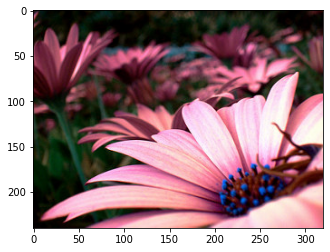

In [7]:
plt.imshow(img)

In [8]:
import numpy as np

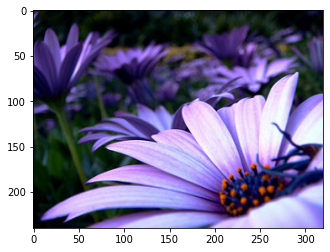

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

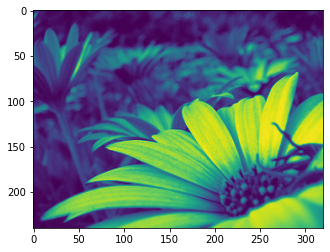

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

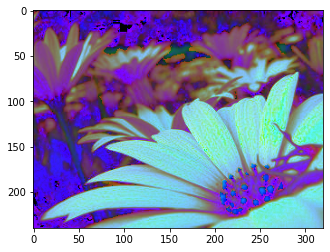

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2HLS))

**IMAGE RESIZE**

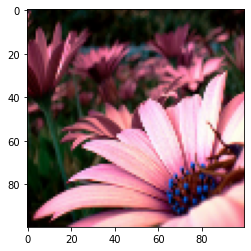

In [12]:
plt.imshow(cv2.resize(img,(100,100)))

In [13]:
rs = cv2.resize(img,(100,100))
print(img.shape)
print(rs.shape)

(240, 320, 3)
(100, 100, 3)


**IMAGE ROTATE**

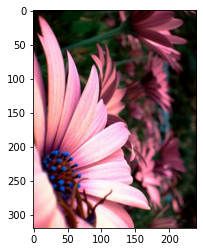

In [14]:
plt.imshow(cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE))

**IMAGE CROP**

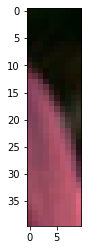

In [15]:
plt.imshow(img[10:50,20:30])

**IMAGE BLUR**

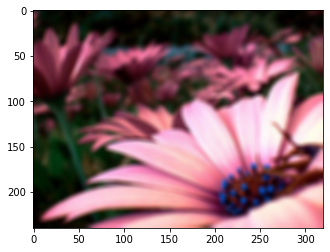

In [16]:
x=cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
plt.imshow(x)

In [17]:
cv2.imwrite('image.jpg',img)

True

**IMAGE AUGMENTATION**

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [20]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
x_train=train_datagen.flow_from_directory(r"/content/drive",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4 images belonging to 4 classes.


In [22]:
x_test=test_datagen.flow_from_directory(r"/content/drive",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4 images belonging to 4 classes.


In [23]:
x_train.class_indices

{'.Trash-0': 0,
 '.file-revisions-by-id': 1,
 '.shortcut-targets-by-id': 2,
 'MyDrive': 3}

**INITIALIZING CNN AND CREATE MODEL**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

**ADD LAYERS**

In [25]:
model=Sequential()

**INPUT LAYERS(CONVOLUTION,MAXPOOLING,FLATTEN)**

In [26]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [27]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
model.add(Flatten())

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


**HIDDEN LAYERS**

In [30]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

**OUTPUT LAYERS**

In [31]:
model.add(Dense(5,activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
len(x_train)

1

**SAVE THE MODEL**

In [34]:
model.save('Flowers_classification_model1.h5')

**TEST THE MODEL**

In [35]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
# Load the model
model=load_model('Flowers_classification_model1.h5')

In [37]:
img=image.load_img(r"/content/1299501272_59d9da5510_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
# x_train.class_indices
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

1/1 [==============================] - 8s 8s/step


'daisy'